DJI Matrice 600 data processing notebook

In [2]:
import matplotlib as mpl
import matplotlib.cm
import matplotlib.pyplot as plt
import matplotlib.dates as dates
import matplotlib.mlab as mlab
from mpl_toolkits.mplot3d import Axes3D 
import numpy as np
import pandas as pd
import pymap3d as pm
#from math import *
from datetime import datetime
from matplotlib.transforms import offset_copy
from matplotlib.ticker import FormatStrFormatter
import cartopy.crs as ccrs
import cartopy.io.img_tiles as cimgt
from cartopy.mpl.gridliner import LONGITUDE_FORMATTER, LATITUDE_FORMATTER
import geopy.distance
from scalebar import scale_bar #requires the existance of scalebar.py
import pyproj
from scipy.stats import norm

import drone

plt.rcParams["figure.figsize"] = (5,5)


ModuleNotFoundError: No module named 'scalebar'

In [ ]:
#process the files
# USEFUL FILES:
# FLY188: Monday morning grid
# FLY189: Monday morning RFI
# FLY191: Monday afternoon
# FLY196: Tuesday morning RFI
# FLY197: Tuesday morning noise source on
# FLY200: Tuesday afternoon absolute GPS test
# FLY203: Wednesday morning
# FLY204: Wednesday morning
# FLY206_FLY207_FLY208_FLY209_FLY210: Wednesday afternoon absolute
# FLY215: Thursday morning beam map

# Write down the name of our file for future reference
NAME = 'FLY257'
#NAME = 'FLY206_FLY207_FLY208_FLY209_FLY210'

#drone.process_files([NAME])


In [5]:
## Now read in the file we just created
df = pd.read_csv("./csv_out/"+NAME+"_processed.csv", sep=',', header=0)
print(df.columns)

df = df.assign(timestamp = pd.to_datetime(df['timestamp'].values))
df = df.where(df != 0.) 
df.dropna(thresh=2, inplace=True)

print(df.columns)

# put the dataframe in a DroneData object
dat = drone.DroneData(df, NAME)

Index(['Unnamed: 0', 'Lat', 'Lon', 'hmsl', 'sec_elapsed', 'datetimestamp',
       'tick', 'vel', 'yaw_rtk', 'pitch_rtk', 'pitch', 'roll', 'yaw',
       'yaw_360', 'timestamp'],
      dtype='object')
Index(['Unnamed: 0', 'Lat', 'Lon', 'hmsl', 'sec_elapsed', 'datetimestamp',
       'tick', 'vel', 'yaw_rtk', 'pitch_rtk', 'pitch', 'roll', 'yaw',
       'yaw_360', 'timestamp'],
      dtype='object')


In [1]:
# Fill in some extra columns
dat.fill_moving()#, method='vel', vel_thresh=0.1)
print(dat.df.columns)

dat.fill_avMov()
print(dat.df.columns)
print(len(df))

NameError: name 'dat' is not defined

<IPython.core.display.Javascript object>


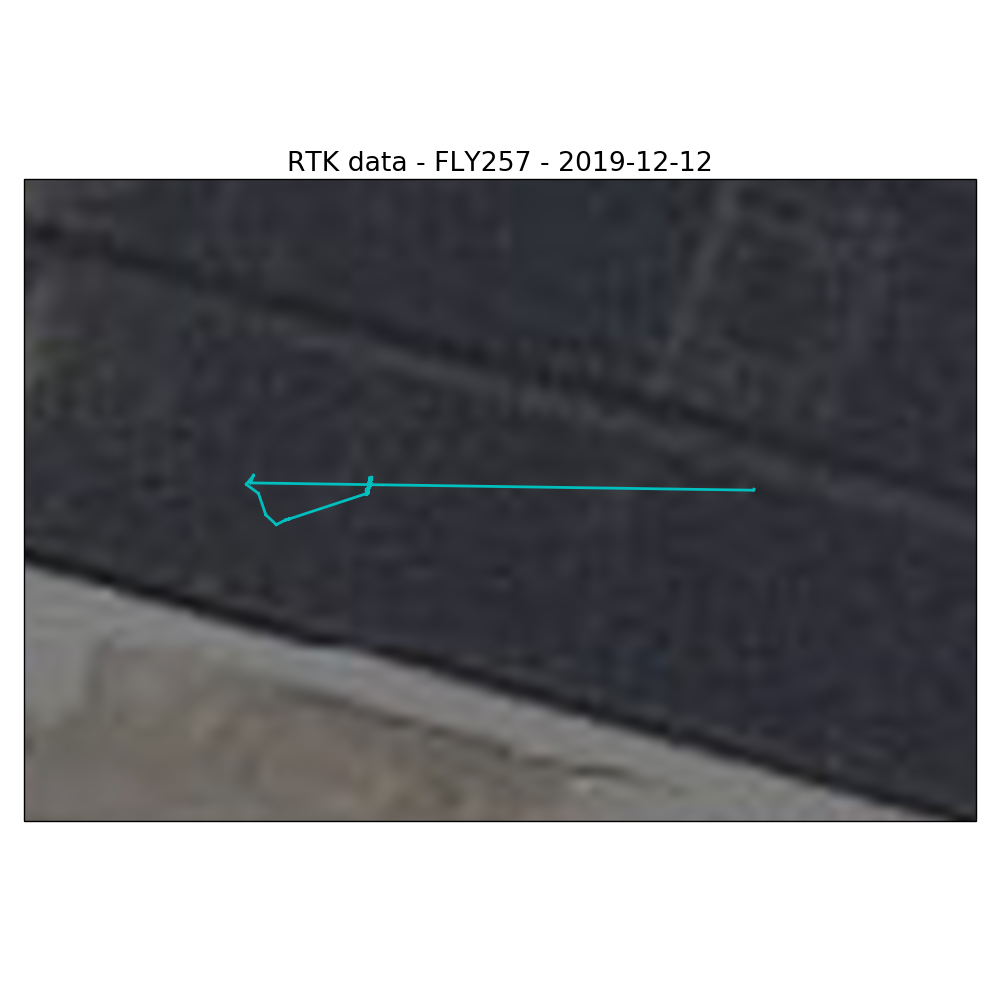

In [7]:
# Plot the flight path
%matplotlib notebook 
dat.plot_satellite()


In [8]:
# pick the center and generate local coordinates
#df = drone.make_ENU(df, lat_origin=37.233385, lon_origin=-118.283470, height_origin=42.5)
#df = drone.make_az_el(df, lat_origin=37.233385, lon_origin=-118.283470, height_origin=42.5)


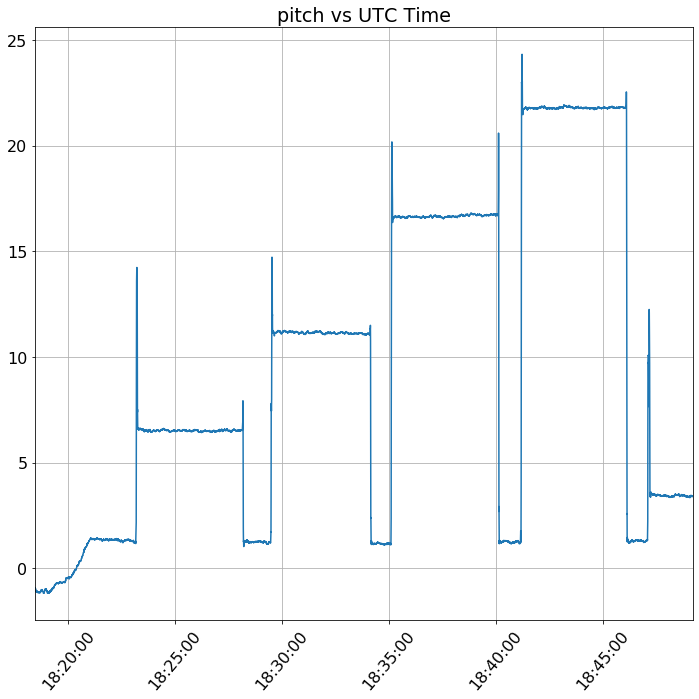

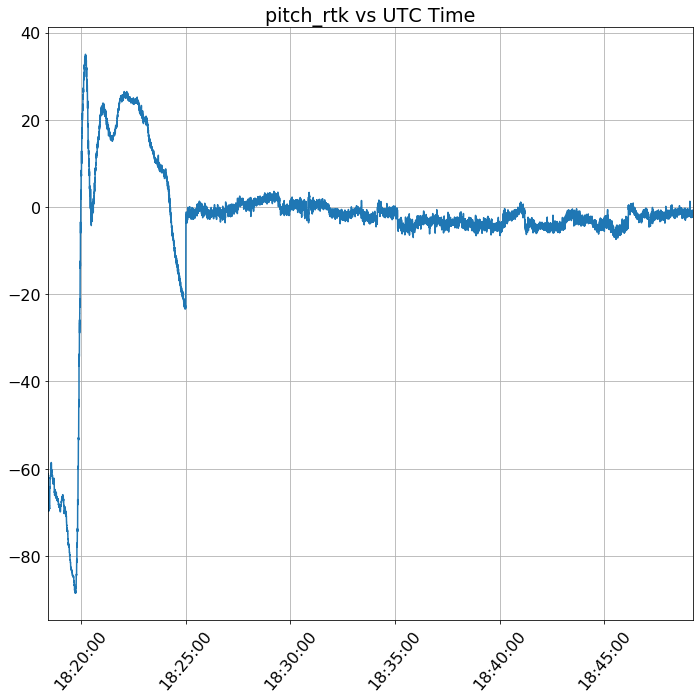

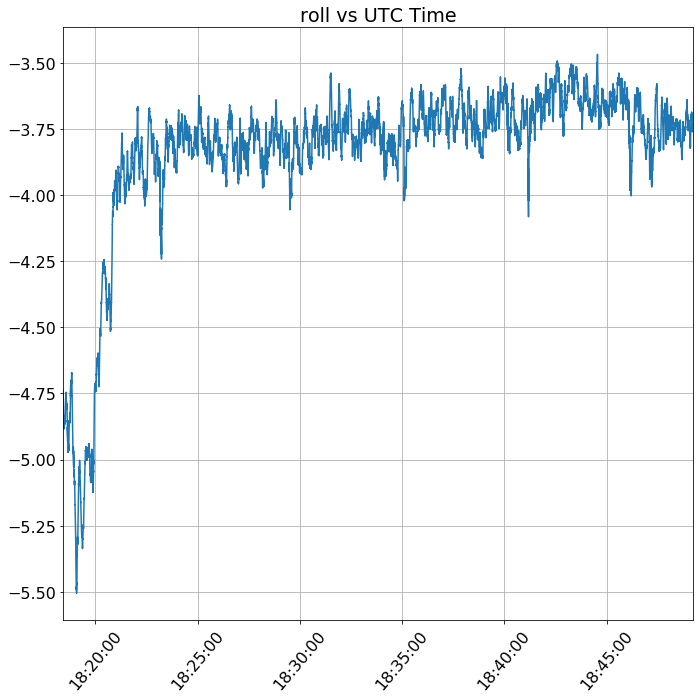

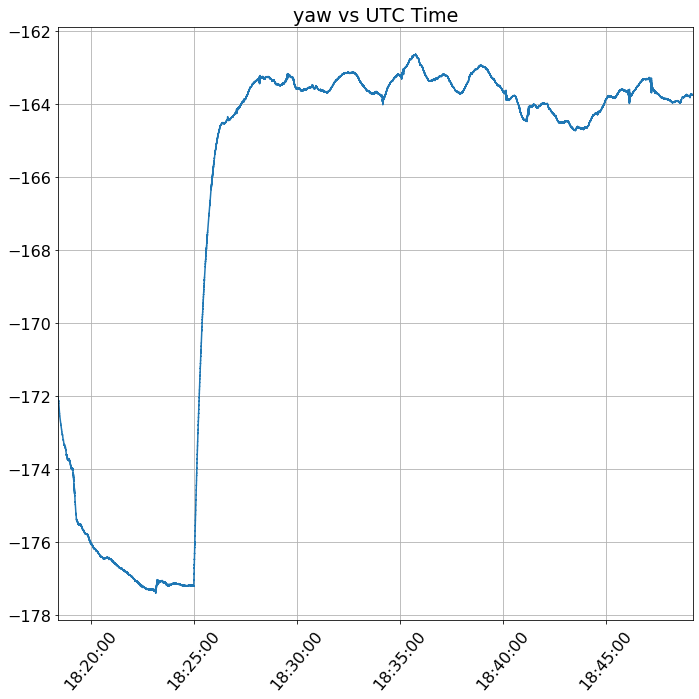

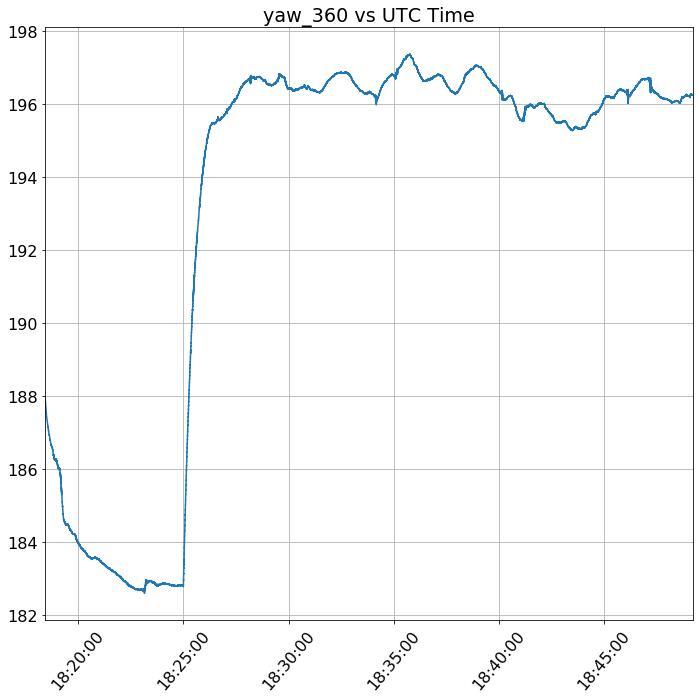

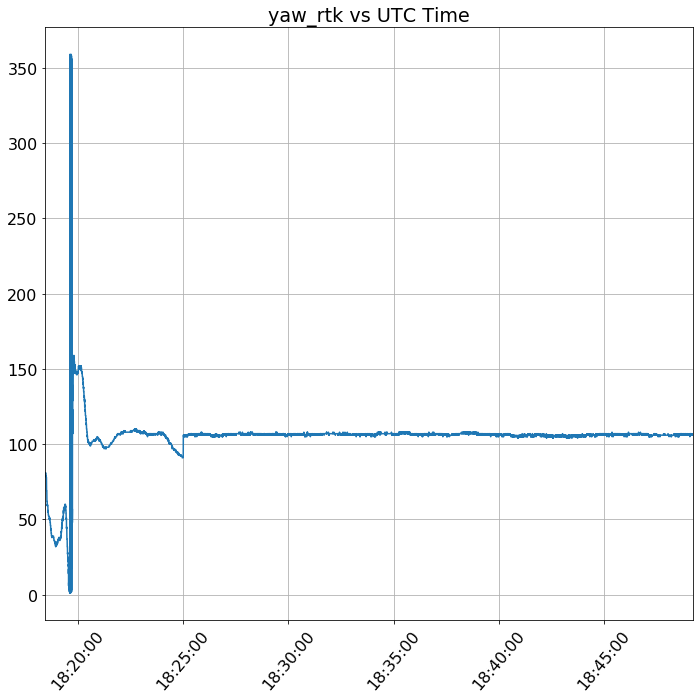

In [10]:
# Plot latitude, longitude, and height
%matplotlib inline
#drone.plot_latitude(df, NAME)
#drone.plot_longitude(df, NAME)
#drone.plot_height(df, NAME)
dat.plot('pitch')
dat.plot('pitch_rtk')
dat.plot('roll')
dat.plot('yaw')
dat.plot('yaw_360')
dat.plot('yaw_rtk')
#dat.plot('Lon')

#%matplotlib notebook
#dat.plot('yaw')
#dat.plot('hmsl')
#drone.plot_control(df, NAME, view='vel')


1197.3254
37.23255558888889
-118.29378062777778
marking point
[False False False ... False False False]
marking point
[False False False ... False False False]
marking point
[False False False ... False False False]
marking point
[False False False ... False False False]
marking point
[False False False ... False False False]
4
0
(37.23255481105222, -118.29377493525679)
1
(37.23255641175681, -118.29377664651916)
2
(37.23255510357025, -118.29377865170983)
3
(37.23255342104364, -118.29377657444985)
Point Coords: 
[(37.23255481105222, -118.29377493525679), (37.23255641175681, -118.29377664651916), (37.23255510357025, -118.29377865170983), (37.23255342104364, -118.29377657444985)]
hello stationary stats
Max diagonal distance: 0.06906515153577567 meters
Latitude standard deviation: 0.00722417795294086 meters
Longitude standard deviation: 0.003372315902936598 meters
Height standard deviation: 0.01042221943677114 meters
Diagonal lat-lon stddev: 0.007972531696553022 meters
hello stationary sta

<IPython.core.display.Javascript object>


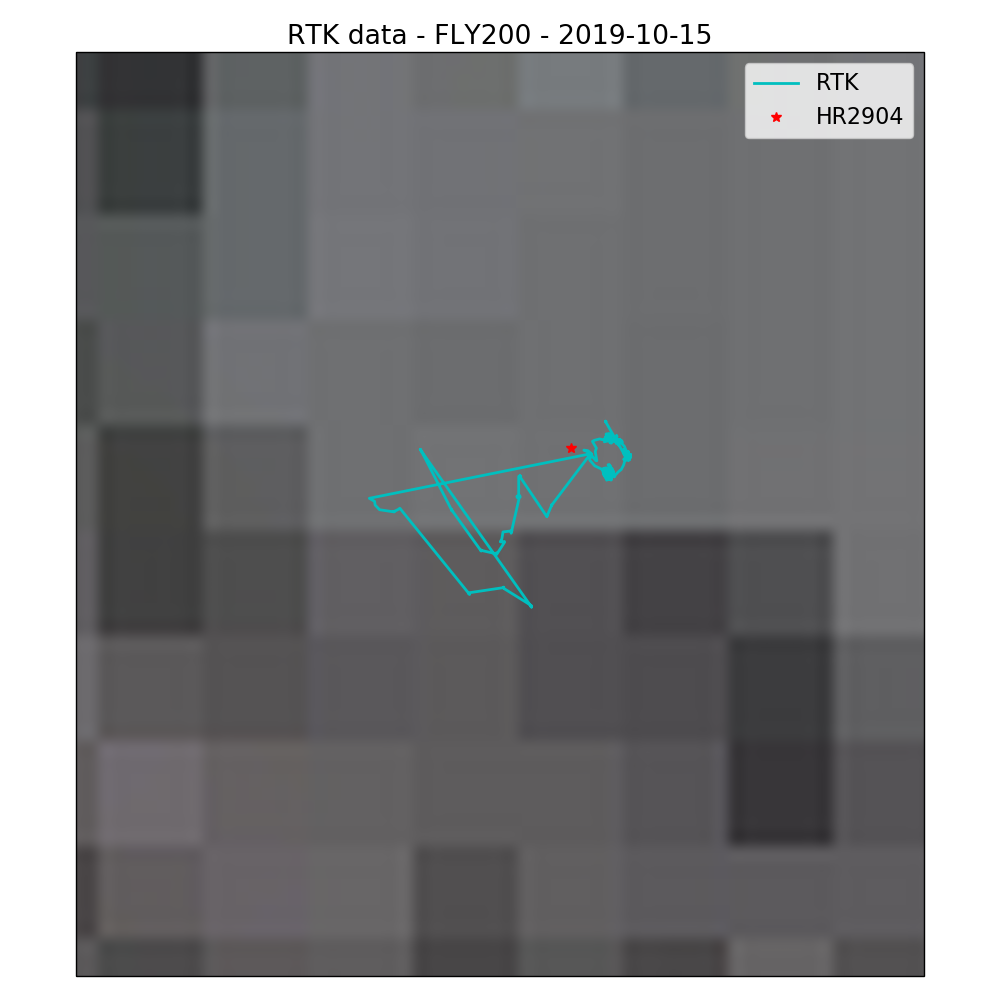

<IPython.core.display.Javascript object>


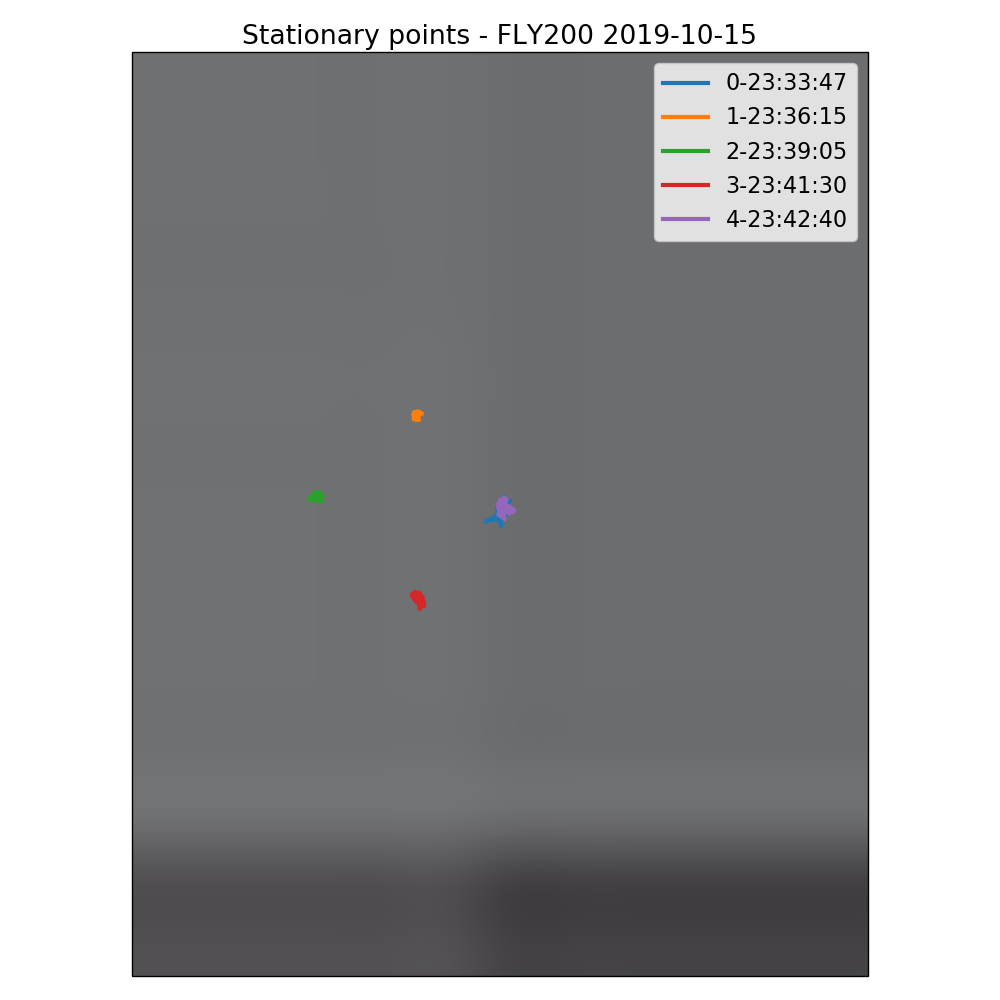

plotting point 0
plotting point 1
plotting point 2
plotting point 3
plotting point 4
saved plot


In [62]:
# check alignment with NGS marker
#################################
# NOTE: I am assuming the drone reports in WGS84/NAD83 compatible coordinates.
# This is a nontrivial assumption, and worth asking DJI about

marker_lat = 37. + 13./60. + 57.20012/3600.
marker_lon = -1.*(118.+ 17./60. + 37.61026/3600.)
marker = (marker_lat, marker_lon)

dat.make_ENU(lat_origin=marker_lat, lon_origin=marker_lon)

dat.df = dat.df.assign(point = np.full_like(df['tick'].values, -1))


### DO NOT DELETE
### Processing absolute GPS tests
if(NAME == 'FLY200'):
    dat.mark_point(np.datetime64("2019-10-15T23:33:47"), np.datetime64("2019-10-15T23:35:15")) #yaw=0
    dat.mark_point(np.datetime64("2019-10-15T23:36:15"), np.datetime64("2019-10-15T23:37:25")) #yaw=265
    dat.mark_point(np.datetime64("2019-10-15T23:39:05"), np.datetime64("2019-10-15T23:40:00")) #yaw=180
    dat.mark_point(np.datetime64("2019-10-15T23:41:30"), np.datetime64("2019-10-15T23:42:05")) #yaw=75ish
    dat.mark_point(np.datetime64("2019-10-15T23:42:40"), np.datetime64("2019-10-15T23:43:45")) #yaw=359
elif(NAME == 'FLY206_FLY207'):
    dat.mark_point(np.datetime64("2019-10-16T22:19:20"), np.datetime64("2019-10-16T22:22:00")) #north
    dat.mark_point(np.datetime64("2019-10-16T22:24:25"), np.datetime64("2019-10-16T22:27:00")) #west
    dat.mark_point(np.datetime64("2019-10-16T22:29:00"), np.datetime64("2019-10-16T22:32:00")) #south
    dat.mark_point(np.datetime64("2019-10-16T22:34:30"), np.datetime64("2019-10-16T22:36:55")) #east
    dat.mark_point(np.datetime64("2019-10-16T22:39:45"), np.datetime64("2019-10-16T22:42:20")) #north again
elif(NAME == 'FLY206_FLY207_FLY208_FLY209_FLY210'):
    dat.mark_point(np.datetime64("2019-10-16T22:20:19"), np.datetime64("2019-10-16T22:22:00")) #north
    dat.mark_point(np.datetime64("2019-10-16T22:24:25"), np.datetime64("2019-10-16T22:27:00")) #west
    dat.mark_point(np.datetime64("2019-10-16T22:29:00"), np.datetime64("2019-10-16T22:32:00")) #south
    dat.mark_point(np.datetime64("2019-10-16T22:34:30"), np.datetime64("2019-10-16T22:36:55")) #east
    dat.mark_point(np.datetime64("2019-10-16T22:39:45"), np.datetime64("2019-10-16T22:42:20")) #north again
    
    
    
point_coords = []
point_dists = []

this_point = 0
print(max(dat.df['point'].values))
for point in range(max(dat.df['point'].values)):
    print(point)
    print(dat.point_coords(point))
    point_coords.append(dat.point_coords(point))
    point_dists.append(geopy.distance.distance(marker, point_coords[-1]).m)

print("Point Coords: ")
print(point_coords)
    
for i in range(max(dat.df['point'].values)):
    dat.point_stats(i)
    
#for i in range(len(points)-1):
#    drone.dist_between_points(df, i, i+1)
  
#drone.dist_between_points(df, 0, 2)
    


print(marker)
for i in range(max(dat.df['point'].values)):
    print("Point "+str(i)+" is "+str(point_dists[i])+"m away from the marker")
    
print(point_coords)
center_coord = (np.mean([x[0] for x in point_coords]), np.mean([x[1] for x in point_coords]))
print(center_coord)
print("The mean position is "+str(geopy.distance.distance(marker, center_coord).m)+"m away from the marker")
print(str(geopy.distance.distance(marker, (center_coord[0], marker[1])).m)+" meters North")
print(str(geopy.distance.distance(marker, (marker[0], center_coord[1])).m)+" meters East")
        
#marker_old = (37. + 13./60. + 57.19937/3600., -1.*(118.+ 17./60. + 37.60922/3600.))

print("Turned RTK and drone off, then back on, at same position")
#print("Offset: "+str(drone.dist_between_times(df, np.datetime64("2019-10-16T23:11:00"), np.datetime64("2019-10-16T23:16:00"))))

# Plot the flight path
%matplotlib notebook 
dat.plot_satellite()
plt.plot(marker[1], marker[0] ,'r*', markersize=7, transform=ccrs.Geodetic(), label="HR2904")
#plt.plot(marker_old[1], marker_old[0] ,'g*', markersize=7, transform=ccrs.Geodetic(), label="2007 Coords")
plt.legend()
plt.savefig('./plots/'+NAME+'_marker.png')
plt.show()

# note: I have tried a bunch of different coordinate transformations.
# None of them yield errors small enough to account for this

dat.plot_points()

<IPython.core.display.Javascript object>


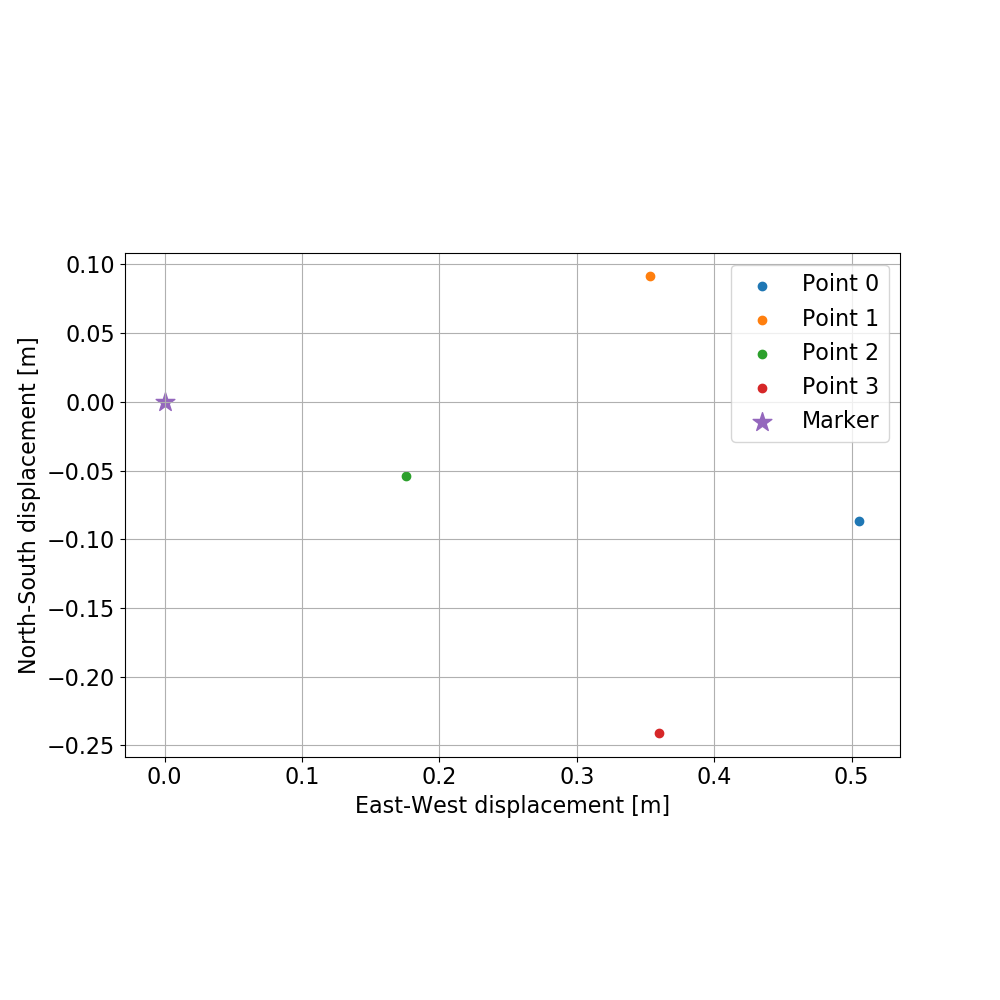

[(0.5052484604910714, -0.08634215876465826), (0.3533627293548778, 0.09134078367010792), (0.17538895170692953, -0.05387180416166208), (0.35975936432697486, -0.2406372342503611)]


In [63]:
# plot points on a meter scale grid

points_latlon = []
points_local = []
marker_dist = []

for i in range(max(dat.df['point'].values)):
    points_latlon.append(dat.point_coords(i))
    points_local.append(dat.point_coords(i, local=True))
    marker_dist.append(geopy.distance.distance(points_latlon[-1], marker).m)
    
fig = plt.figure(figsize=(10,10))
#cm = plt.get_cmap("Paired")
ax = plt.gca()
ax.autoscale()
#ax.set_prop_cycle(color=[cm(1.*i/12) for i in range(12)])
ax.set_aspect('equal')

for i in range(max(dat.df['point'].values)):
    plt.scatter(points_local[i][0], points_local[i][1], label="Point %d"%i)
plt.scatter(0,0, label="Marker", marker="*", s=200)

plt.xlabel("East-West displacement [m]")
plt.ylabel("North-South displacement [m]")

#plt.xlim(-10, 10)
#plt.ylim(-10, 10)

plt.legend()
plt.grid()
plt.show()
plt.savefig("./plots/points_local_"+dat.name+".png")

print(points_local)

In [40]:
# check the grid test results

if dat.name == 'FLY206_FLY207' or dat.name == 'FLY206_FLY207_FLY208_FLY209_FLY210':
    dat_cut = dat.chop_time(np.datetime64("2019-10-16T22:50:00"), np.datetime64("2019-10-16T23:13:00")) #grid times
    dat_cut.plot_latitude(df_cut)
    dat_cut.plot_longitude(df_cut)
    dat_cut.plot_satellite(df_cut)
    # point 0: Origin
    # point 1: 1cm E
    # point 2: 2cm E
    # point 3: 7cm E
    # point 4: 1cm N
    # point 5: 2cm N
    # point 6: 5cm N
    origin = 0 #TODO COORDS OF ORIGIN
    
    


AttributeError: 'DroneData' object has no attribute 'plot_latitude'